## Dia 1

Neste primeiro dia, estaremos estudando os dos datasets do portal **CEAPS** e aplicar processos de tratamento e limpeza de dados nele.

Basicamente, o CEAPS contém todos os gastos que senadores brasileiros declararam, divididos por ano.

Os dados do CEAPS contêm uma série de problemas que podem dificultar a criação de análises mais aprofundadas.

Uma das primeiras coisas que faremos é identificar tais inconsistências, como campos que possuem valores nulos ou duplicados, converter campos de data que estão sendo carregados como texto, corrigir valores monetários, nomes incorretos, formatar campos de CNPJ, etc.

In [402]:
import pandas as pd

In [403]:
dados = pd.read_csv('despesa_ceaps_2008.csv', sep=';', encoding='ISO-8859-1', skiprows=1)
dados

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2008,9,ADA MELLO,"Contratação de consultorias, assessorias, pesq...",NaN,NaN,NaN,NaN,NaN,"12351,52",2008090814004
1,2008,9,ADA MELLO,"Locomoção, hospedagem, alimentação, combustíve...",NaN,NaN,NaN,NaN,NaN,"386,6",2008090814003
2,2008,10,ADA MELLO,"Contratação de consultorias, assessorias, pesq...",NaN,NaN,NaN,NaN,NaN,"12351,52",2008100814004
3,2008,10,ADA MELLO,"Locomoção, hospedagem, alimentação, combustíve...",NaN,NaN,NaN,NaN,NaN,"2610,68",2008100814003
4,2008,11,ADA MELLO,"Contratação de consultorias, assessorias, pesq...",NaN,NaN,NaN,NaN,NaN,"12351,52",2008110814004
...,...,...,...,...,...,...,...,...,...,...,...
2444,2008,11,WELLINGTON SALGADO DE OLIVEIRA,"Locomoção, hospedagem, alimentação, combustíve...",NaN,NaN,NaN,NaN,NaN,"6152,97",2008110587703
2445,2008,12,WELLINGTON SALGADO DE OLIVEIRA,"Aluguel de imóveis para escritório político, c...",NaN,NaN,NaN,NaN,NaN,"3818,87",2008120587701
2446,2008,12,WELLINGTON SALGADO DE OLIVEIRA,Aquisição de material de consumo para uso no e...,NaN,NaN,NaN,NaN,NaN,"886,66",2008120587702
2447,2008,12,WELLINGTON SALGADO DE OLIVEIRA,"Contratação de consultorias, assessorias, pesq...",NaN,NaN,NaN,NaN,NaN,7070,2008120587704


In [404]:
for i in range(2009, 2023):
    df = pd.read_csv(f'despesa_ceaps_{i}.csv', sep=';', encoding='ISO-8859-1', skiprows=1)
    dados = pd.concat([dados, df], axis=0)

dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317986 entries, 0 to 16804
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ANO                317986 non-null  int64  
 1   MES                317986 non-null  int64  
 2   SENADOR            317986 non-null  object 
 3   TIPO_DESPESA       317986 non-null  object 
 4   CNPJ_CPF           314842 non-null  object 
 5   FORNECEDOR         314842 non-null  object 
 6   DOCUMENTO          293176 non-null  object 
 7   DATA               314842 non-null  object 
 8   DETALHAMENTO       180631 non-null  object 
 9   VALOR_REEMBOLSADO  317986 non-null  object 
 10  COD_DOCUMENTO      317984 non-null  float64
dtypes: float64(1), int64(2), object(8)
memory usage: 29.1+ MB


In [405]:
dados.duplicated().sum()

np.int64(0)

#### Como é possível ver, nosso dados não possui problemas com valores duplicados

In [406]:
dados.isna().sum()

ANO                       0
MES                       0
SENADOR                   0
TIPO_DESPESA              0
CNPJ_CPF               3144
FORNECEDOR             3144
DOCUMENTO             24810
DATA                   3144
DETALHAMENTO         137355
VALOR_REEMBOLSADO         0
COD_DOCUMENTO             2
dtype: int64

#### É perceptível que a coluna detalhamento tem muitos valores nulos, mas como ela só especifica com relação ao tipo de despesa, que neste caso não possui valores nulos, podemos simplesmente removê-la de nossa análise.

#### Com uma breve pesquisa, foi descoberto que a coluna 'DOCUMENTO' refere-se ao número da nota fiscal ou recibo apresentado pelo fornecedor. Com isso concluímos que esta coluna não nos trás muita informação, logo será removida do nosso dataframe.

#### Durante o tratamento dos dados, foram encontrados algumas inconsistências nos dados, tais qual erro em um valor da coluna 'VALOR_REEMBOLSADO' que foi facilmente resolvido e erro de data na coluna 'DATA' na qual esta tansformaremos em valor nulo e tiraremos ela de nossa análise.

#### Como a quantidade de fornecedores nulo é baixa, cosideraremos ela não sendo importante para esta análise, uma vez que ainda não foi dado qual os próximos passos do desafio.

In [407]:
dados['DATA'] = pd.to_datetime(dados['DATA'], format='%d/%m/%Y', errors='coerce')
dados['COD_DOCUMENTO'] = dados['COD_DOCUMENTO'].astype('string')
dados['CNPJ_CPF'] = dados['CNPJ_CPF'].astype('string')
dados['FORNECEDOR'] = dados['FORNECEDOR'].astype('string')
dados['SENADOR'] = dados['SENADOR'].astype('string')
dados['VALOR_REEMBOLSADO'] = [valor.replace(',','.') for valor in dados['VALOR_REEMBOLSADO']]
dados['VALOR_REEMBOLSADO'] = [valor.replace(',','.')  for valor in dados['VALOR_REEMBOLSADO']]
dados['VALOR_REEMBOLSADO'] = dados['VALOR_REEMBOLSADO'].replace('1\r\n675.55','1675.55')
dados['VALOR_REEMBOLSADO'] = dados['VALOR_REEMBOLSADO'].astype(float)
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317986 entries, 0 to 16804
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ANO                317986 non-null  int64         
 1   MES                317986 non-null  int64         
 2   SENADOR            317986 non-null  string        
 3   TIPO_DESPESA       317986 non-null  object        
 4   CNPJ_CPF           314842 non-null  string        
 5   FORNECEDOR         314842 non-null  string        
 6   DOCUMENTO          293176 non-null  object        
 7   DATA               314819 non-null  datetime64[ns]
 8   DETALHAMENTO       180631 non-null  object        
 9   VALOR_REEMBOLSADO  317986 non-null  float64       
 10  COD_DOCUMENTO      317984 non-null  string        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3), string(4)
memory usage: 29.1+ MB


In [408]:
dados = dados.drop(['DETALHAMENTO', 'DOCUMENTO'], axis=1)
dados = dados.dropna()
dados = dados.reset_index()
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314819 entries, 0 to 314818
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   index              314819 non-null  int64         
 1   ANO                314819 non-null  int64         
 2   MES                314819 non-null  int64         
 3   SENADOR            314819 non-null  string        
 4   TIPO_DESPESA       314819 non-null  object        
 5   CNPJ_CPF           314819 non-null  string        
 6   FORNECEDOR         314819 non-null  string        
 7   DATA               314819 non-null  datetime64[ns]
 8   VALOR_REEMBOLSADO  314819 non-null  float64       
 9   COD_DOCUMENTO      314819 non-null  string        
dtypes: datetime64[ns](1), float64(1), int64(3), object(1), string(4)
memory usage: 24.0+ MB


## Dia 2

Neste dia, investigaremos os dados e gerararemos visualizações para identificar padrões estranhos ou estatísticas interessantes.

Responderemos algumas perguntas, sendo elas:

- Qual foi o senador que mais declarou despesas?

- Quais tipos de despesas foram mais gastas por ano?

### Qual foi o senador que mais declarou despesas?

In [409]:
maior_despesas = dados[['SENADOR', 'TIPO_DESPESA']].copy()
maior_despesas = maior_despesas.groupby('SENADOR')['TIPO_DESPESA'].value_counts().reset_index()
maior_despesas.head()

,SENADOR,TIPO_DESPESA,count
0,ACIR GURGACZ,"Passagens aéreas, aquáticas e terrestres nacio...",710
1,ACIR GURGACZ,"Locomoção, hospedagem, alimentação, combustíve...",654
2,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",418
3,ACIR GURGACZ,Divulgação da atividade parlamentar,408
4,ACIR GURGACZ,Aquisição de material de consumo para uso no e...,131


In [410]:
maior_despesas = maior_despesas.drop(columns='TIPO_DESPESA')
maior_despesas.rename(columns={'count': 'QUANTIDADE_DESPESAS'}, inplace=True)
maior_despesas = maior_despesas.groupby('SENADOR').sum()
maior_despesas = maior_despesas.sort_values(by='QUANTIDADE_DESPESAS', ascending=False).reset_index()
maior_despesas.head(7)

,SENADOR,QUANTIDADE_DESPESAS
0,PAULO PAIM,8776
1,HUMBERTO COSTA,8313
2,PAULO BAUER,6384
3,LÍDICE DA MATA,5730
4,JOÃO CAPIBERIBE,5503
5,WELLINGTON FAGUNDES,5435
6,ROBERTO REQUIÃO,4828


In [411]:
top_senadores = maior_despesas.head(7)

In [412]:
import matplotlib.pyplot as plt
import seaborn as sns

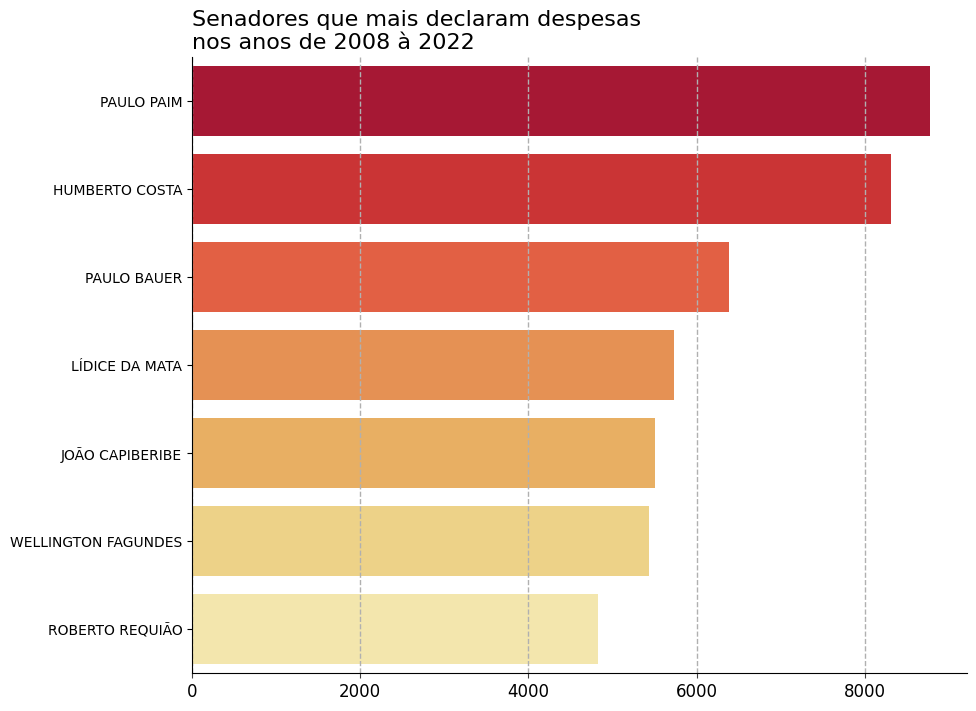

In [413]:
fig, ax = plt.subplots(figsize = (10,8))

ax = sns.barplot(top_senadores, x='QUANTIDADE_DESPESAS', y='SENADOR', palette='YlOrRd_r', hue='SENADOR')
ax.set_title('Senadores que mais declaram despesas\nnos anos de 2008 à 2022', loc='left', fontsize=16)
ax.set_xlabel('')
ax.set_ylabel('')

ax.yaxis.set_tick_params(labelsize=10)
ax.xaxis.set_tick_params(labelsize=12, color='#414040')
ax.xaxis.grid(linestyle='--', linewidth=1)
sns.despine()

plt.show()

### Quais tipos de despesas foram mais gastas por ano?

In [414]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314819 entries, 0 to 314818
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   index              314819 non-null  int64         
 1   ANO                314819 non-null  int64         
 2   MES                314819 non-null  int64         
 3   SENADOR            314819 non-null  string        
 4   TIPO_DESPESA       314819 non-null  object        
 5   CNPJ_CPF           314819 non-null  string        
 6   FORNECEDOR         314819 non-null  string        
 7   DATA               314819 non-null  datetime64[ns]
 8   VALOR_REEMBOLSADO  314819 non-null  float64       
 9   COD_DOCUMENTO      314819 non-null  string        
dtypes: datetime64[ns](1), float64(1), int64(3), object(1), string(4)
memory usage: 24.0+ MB


In [415]:
dados['TIPO_DESPESA'].unique()

array(['Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.',
       'Divulgação da atividade parlamentar',
       'Locomoção, hospedagem, alimentação, combustíveis e lubrificantes',
       'Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar',
       'Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos. ',
       'Passagens aéreas, aquáticas e terrestres nacionais',
       'Serviços de Segurança Privada'], dtype=object)

In [416]:
tipo_maior_gasto = dados[['TIPO_DESPESA','ANO']].copy()
tipo_maior_gasto = tipo_maior_gasto.groupby(['TIPO_DESPESA'])['ANO'].value_counts().reset_index()
tipo_maior_gasto = tipo_maior_gasto.rename(columns={'count': 'QUANTIDADE_DESPESAS'})
tipo_maior_gasto

,TIPO_DESPESA,ANO,QUANTIDADE_DESPESAS
0,"Aluguel de imóveis para escritório político, c...",2013,5437
1,"Aluguel de imóveis para escritório político, c...",2016,5349
2,"Aluguel de imóveis para escritório político, c...",2017,5322
3,"Aluguel de imóveis para escritório político, c...",2012,5152
4,"Aluguel de imóveis para escritório político, c...",2018,5041
...,...,...,...
89,Serviços de Segurança Privada,2018,44
90,Serviços de Segurança Privada,2021,35
91,Serviços de Segurança Privada,2020,32
92,Serviços de Segurança Privada,2022,24


In [417]:
tabela_despesas = pd.pivot_table(data=tipo_maior_gasto, values='QUANTIDADE_DESPESAS', index='TIPO_DESPESA', columns='ANO', aggfunc='sum', margins=True, margins_name='Total')
tabela_despesas

ANO,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Total
TIPO_DESPESA,,,,,,,,,,,,,,,
"Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.",2895.0,3609.0,4150.0,5152.0,5437.0,4815.0,4883.0,5349.0,5322.0,5041.0,4106.0,4084.0,3693.0,3322.0,61858
"Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos.",1589.0,1952.0,2366.0,2378.0,2406.0,2084.0,1840.0,2024.0,1821.0,1761.0,1316.0,1216.0,1249.0,1226.0,25228
"Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar",644.0,802.0,808.0,720.0,674.0,666.0,1151.0,971.0,987.0,928.0,981.0,1016.0,1088.0,1043.0,12479
Divulgação da atividade parlamentar,764.0,318.0,1156.0,921.0,1144.0,737.0,931.0,1083.0,1195.0,750.0,860.0,1161.0,1427.0,1038.0,13485
"Locomoção, hospedagem, alimentação, combustíveis e lubrificantes",9893.0,11554.0,11938.0,13140.0,11540.0,7454.0,9649.0,10336.0,10906.0,10146.0,8553.0,4442.0,5754.0,6769.0,132074
"Passagens aéreas, aquáticas e terrestres nacionais",NaN,NaN,5080.0,7762.0,8090.0,6141.0,7456.0,6856.0,6651.0,5820.0,5795.0,2138.0,3580.0,3383.0,68752
Serviços de Segurança Privada,NaN,NaN,76.0,102.0,85.0,105.0,138.0,144.0,136.0,44.0,22.0,32.0,35.0,24.0,943
Total,15785.0,18235.0,25574.0,30175.0,29376.0,22002.0,26048.0,26763.0,27018.0,24490.0,21633.0,14089.0,16826.0,16805.0,314819


#### Dado que foram encontrado valores nulos em alguns blocos, definiremos como sendo 0 o seu valor, uma vez que não há registros com gastos neste tipo e ano.

In [418]:
tabela_despesas = tabela_despesas.fillna(0)
tabela_despesas = tabela_despesas.astype(int)
tabela_despesas_estilizada = tabela_despesas.style
tabela_despesas_estilizada

ANO,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Total
TIPO_DESPESA,,,,,,,,,,,,,,,
"Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.",2895,3609,4150,5152,5437,4815,4883,5349,5322,5041,4106,4084,3693,3322,61858
"Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos.",1589,1952,2366,2378,2406,2084,1840,2024,1821,1761,1316,1216,1249,1226,25228
"Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar",644,802,808,720,674,666,1151,971,987,928,981,1016,1088,1043,12479
Divulgação da atividade parlamentar,764,318,1156,921,1144,737,931,1083,1195,750,860,1161,1427,1038,13485
"Locomoção, hospedagem, alimentação, combustíveis e lubrificantes",9893,11554,11938,13140,11540,7454,9649,10336,10906,10146,8553,4442,5754,6769,132074
"Passagens aéreas, aquáticas e terrestres nacionais",0,0,5080,7762,8090,6141,7456,6856,6651,5820,5795,2138,3580,3383,68752
Serviços de Segurança Privada,0,0,76,102,85,105,138,144,136,44,22,32,35,24,943
Total,15785,18235,25574,30175,29376,22002,26048,26763,27018,24490,21633,14089,16826,16805,314819


In [419]:
cabecalho = {
    'selector': 'th',
    'props': 'font-family: DM Sans, sans-serif; font-weight:bold; text-align:left; color:#E5D8ED; background-color:#35358B;' \
            'border-bottom: 0.1rem solid #FADE5F; border-right: 0.1rem solid #FADE5F; padding: 10px'
}
cabecalho_anos = {
    'selector': 'th:not(.index_name,th.row_heading)',
    'props': 'font-family: Roboto, sans-serif; text-align:center; color:#E5D8ED; background-color:#35358B;' \
            'padding-left: 7px; padding-right: 7px;'
}

corpo = {
    'selector': 'td,',
    'props': 'font-family: Roboto, sans-serif; font-weight:bold; text-align:center; color:#E5D8ED;' \
            'border-bottom: 0.1rem solid #FADE5F; border-right: 0.1rem solid #FADE5F; padding-left: 7px; padding-right: 7px;'
}

tabela_despesas_estilizada.set_table_styles([cabecalho_anos, cabecalho, corpo])
tabela_despesas_estilizada.highlight_max(color='darkred', axis=0)
tabela_despesas_estilizada.highlight_max(color='darkred', axis=1)

ANO,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Total
TIPO_DESPESA,,,,,,,,,,,,,,,
"Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.",2895,3609,4150,5152,5437,4815,4883,5349,5322,5041,4106,4084,3693,3322,61858
"Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos.",1589,1952,2366,2378,2406,2084,1840,2024,1821,1761,1316,1216,1249,1226,25228
"Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar",644,802,808,720,674,666,1151,971,987,928,981,1016,1088,1043,12479
Divulgação da atividade parlamentar,764,318,1156,921,1144,737,931,1083,1195,750,860,1161,1427,1038,13485
"Locomoção, hospedagem, alimentação, combustíveis e lubrificantes",9893,11554,11938,13140,11540,7454,9649,10336,10906,10146,8553,4442,5754,6769,132074
"Passagens aéreas, aquáticas e terrestres nacionais",0,0,5080,7762,8090,6141,7456,6856,6651,5820,5795,2138,3580,3383,68752
Serviços de Segurança Privada,0,0,76,102,85,105,138,144,136,44,22,32,35,24,943
Total,15785,18235,25574,30175,29376,22002,26048,26763,27018,24490,21633,14089,16826,16805,314819


In [436]:
def colorir_fundo(valor, indice, coluna):
    if indice == 'Total' or coluna == 'Total':
        return 'background-color:red'
    if valor == 5437 or valor == 2406 or valor == 1151 or valor == 1427 or valor == 13140 or valor == 8090 or valor == 144:
        return 'background-color: #FAA50B'
    return 'background-color:#35358B;'

def escolhe_bloco(dados):
    estilo = pd.DataFrame('', index=dados.index, columns=dados.columns)
    for indice in tabela_despesas.index:
        for coluna in tabela_despesas.columns:
            estilo.loc[indice,coluna] = colorir_fundo(tabela_despesas.loc[indice, coluna], indice, coluna)
            
    return estilo

In [437]:
tabela_despesas_estilizada = tabela_despesas_estilizada.apply(escolhe_bloco, axis=None)

tabela_despesas_estilizada

ANO,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Total
TIPO_DESPESA,,,,,,,,,,,,,,,
"Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.",2895,3609,4150,5152,5437,4815,4883,5349,5322,5041,4106,4084,3693,3322,61858
"Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos.",1589,1952,2366,2378,2406,2084,1840,2024,1821,1761,1316,1216,1249,1226,25228
"Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar",644,802,808,720,674,666,1151,971,987,928,981,1016,1088,1043,12479
Divulgação da atividade parlamentar,764,318,1156,921,1144,737,931,1083,1195,750,860,1161,1427,1038,13485
"Locomoção, hospedagem, alimentação, combustíveis e lubrificantes",9893,11554,11938,13140,11540,7454,9649,10336,10906,10146,8553,4442,5754,6769,132074
"Passagens aéreas, aquáticas e terrestres nacionais",0,0,5080,7762,8090,6141,7456,6856,6651,5820,5795,2138,3580,3383,68752
Serviços de Segurança Privada,0,0,76,102,85,105,138,144,136,44,22,32,35,24,943
Total,15785,18235,25574,30175,29376,22002,26048,26763,27018,24490,21633,14089,16826,16805,314819


#### Gostaríamos de fazer mais análises, sendo elas relacionadas às cotas que cada senador gastou, mas os dados não nos oferece esta informação. Análise esta porposta pelo desafio, como por exemplo "**Qual foi o percentual da cota que os senadores gastaram?**".